# Task 2 - Machine Learning
Emilia Couret Villafañe

**Resources**:
- [Scikit learn API - Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)  
- [ChatGPT Consultation](https://chatgpt.com/share/68f7ecee-05a4-800b-87ba-c0946aa015dd)

**Personal Experience**:

**Dates**: Oct 19 - Oct 21

Version

In [1]:
!python --version
!jupyter --version

Python 3.13.7
Selected Jupyter core packages...
IPython          : 9.6.0
ipykernel        : 7.0.1
ipywidgets       : not installed
jupyter_client   : 8.6.3
jupyter_core     : 5.9.1
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : not installed
nbconvert        : not installed
nbformat         : not installed
notebook         : not installed
qtconsole        : not installed
traitlets        : 5.14.3


Libraries

In [2]:
from PIL import Image
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from math import floor
from collections import Counter 
import matplotlib.pyplot as plt
import os
import numpy as np

---
Training SVM Model
---

Averages of RGB channel values and NDVI as training data.

## Read dataset dir names.

In [3]:
path = "/Users/tiffie/Uni/Code/pandahat/Learning_Path/Task_1"

sample_dir = os.listdir(f"{path}/samples/")
label_dir = os.listdir(f"{path}/labels/")
sample_dir.sort()
label_dir.sort()

samples = np.ndarray(shape=(len(label_dir), 256, 256, 3))
labels  = np.ndarray(shape=(len(label_dir), 256, 256))

print("Samples file names:")
__import__('pprint').pprint(sample_dir[:5])
print("\n")

print("Labels file names:")
__import__('pprint').pprint(label_dir[:5])

Samples file names:
['S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_0.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_1.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_10.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_100.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_101.tiff']


Labels file names:
['S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_0.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_1.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_10.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_100.tiff',
 'S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_101.tiff']


## Load dataset into two multidimensional matrices.

- Dimension 1: Amount of entries in the dataset.  
- D 2 & 3: Pixel matrix.  
- D 4 (`samples` only): RGB channels.

In [4]:
for i in range(len(sample_dir)):
    sample = Image.open(f"{path}/samples/{sample_dir[i]}")
    label = Image.open(f"{path}/labels/{label_dir[i]}")

    if i == 0:
        print(sample_dir[i])
        print(label_dir[i])

    sample_arr = np.array(sample)
    label_arr = np.array(label)

    samples[i] = sample_arr
    labels[i] = label_arr

print(samples.shape)
print(labels.shape, end="\n\n")

print(samples[0][0][:5], end="\n\n")
print(labels[0][0][:5])

S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_0.tiff
S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_0.tiff
(614, 256, 256, 3)
(614, 256, 256)

[[24. 26. 27.]
 [24. 26. 28.]
 [24. 26. 27.]
 [24. 25. 27.]
 [24. 26. 27.]]

[124. 123. 123. 124. 123.]


S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_0.tiff
S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_0.tiff


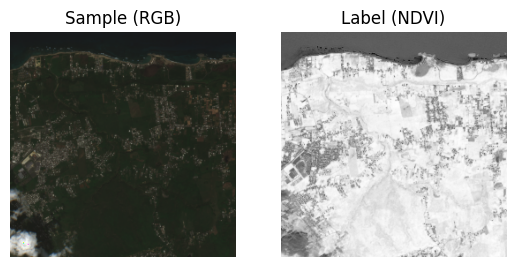

In [5]:
_, axs = plt.subplots(1, 2)

print(sample_dir[0])
print(label_dir[0])

axs[0].imshow(samples[0].astype(np.uint8))
axs[0].set_title("Sample (RGB)")

axs[1].imshow(labels[0], cmap='Grays_r')
axs[1].set_title("Label (NDVI)")

for i in range(2): axs[i].set_axis_off()

## Data Preprocessing

Since SVM is a *classification* algorithm, three classes are introduced, according to the NDVI value:  
- **Class -1** (`0-150`): Sparely Vegetative
- **Class 0** (`150-170`): Moderately Vegetative
- **Class 1** (`170-255`): Densly Vegetative

This decision is justified based on the statistical distribution of the NDVI values:

In [6]:
label_arr = []

for i in range(len(labels)):
    for j in range(255):
        for k in range(255):
            label_arr.append(labels[i][j][k])

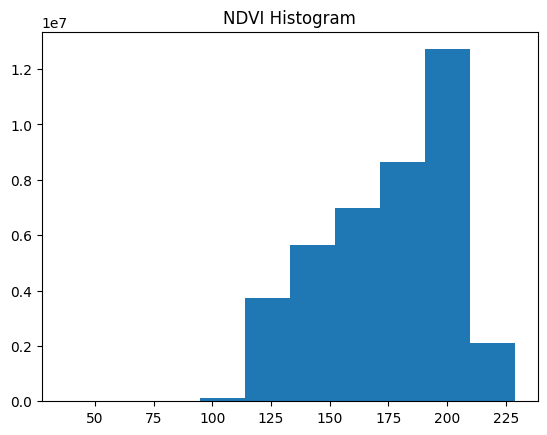

In [7]:
plt.hist(label_arr)
plt.title("NDVI Histogram")
plt.show()

### Assignment of labels

In [ ]:
cat_labels = np.ndarray(shape=(len(labels), 256, 256, 1))

for i in range(len(labels)):
    for j in range(255):
        for k in range(255):
            category = -1 if labels[i][j][k] < 150 else 0
            category = 1 if labels[i][j][k] > 170 else 0

            cat_labels[i][j][k] = category

S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_img_0.tiff
S2A_MSIL2A_20171025T150721_N0500_R082_T19QGA_20230910T203157.SAFE_ndvi_0.tiff


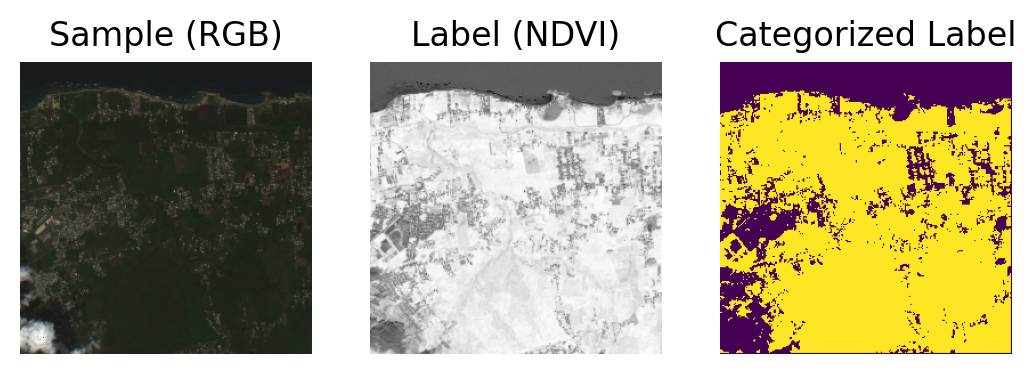

In [9]:
plt.rcParams['figure.dpi'] = 200
_, axs = plt.subplots(1, 3)

print(sample_dir[0])
print(label_dir[0])

axs[0].imshow(samples[0].astype(np.uint8))
axs[0].set_title("Sample (RGB)")

axs[1].imshow(labels[0], cmap='Grays_r')
axs[1].set_title("Label (NDVI)")

axs[2].imshow(cat_labels[0])
axs[2].set_title("Categorized Label")

for i in range(3): axs[i].set_axis_off()

## Model Training

In [10]:
X = samples.reshape(-1, 3)
y = cat_labels.reshape(-1)

print(X)
print(y)

[[24. 26. 27.]
 [24. 26. 28.]
 [24. 26. 27.]
 ...
 [31. 34. 30.]
 [32. 38. 36.]
 [27. 32. 27.]]
[0. 0. 0. ... 0. 0. 0.]


In [11]:
classneg1 = class0 = classpos1 = 0

for i in range(len(y)):
    if y[i] == -1: classneg1 += 1
    elif y[i] == 0: class0 += 1
    elif y[i] == 1: classpos1 += 1

print(classneg1, class0, classpos1)

0 16073282 23854569


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)

In [ ]:
samples = samples.reshape(614, 256)
print(samples.shape)

#samples = samples.reshape(len(samples),, )
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

print(clf)